# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)
print(type(randoms))

[2.77602008 2.07037096 2.17713173 2.03764191 2.25131643 2.33150866
 2.60504612 2.9928103  2.70165768 2.47861756]
<class 'numpy.ndarray'>


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

(array([107.,  97.,  98.,  88.,  87., 115., 102.,  93., 115.,  98.]),
 array([10.08613278, 15.06886897, 20.05160517, 25.03434136, 30.01707756,
        34.99981375, 39.98254995, 44.96528614, 49.94802234, 54.93075853,
        59.91349473]),
 <a list of 10 Patch objects>)

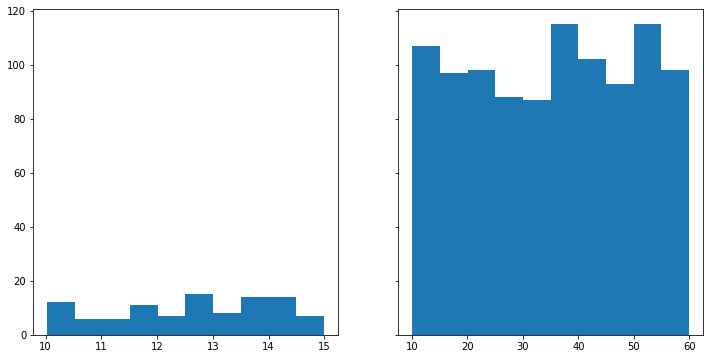

In [31]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def uniform_rand(bottom,ceiling,count):
    return bottom + (ceiling-bottom)*uniform.rvs(size=count)

fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True)

ax[0].hist(x=uniform_rand(10,15,100), bins=10)
ax[1].hist(x=uniform_rand(10,60,1000), bins=10)# to obtain the figure above change 1000 to 130

How are the two distributions different?

In [5]:
# your answer here:
"""
The range of the first one is smaller than the second one. They both show an approximately
constant frequency of each of the possible values.
"""

'\nThe 2 distributions are not different when considered in relative terms respect with the count \nof numbers generated, the higher the count the more uniform the values in terms of frequency,\nas it should be consistently with the law of large numbers when numbers are drawn from a\nuniform distribution like in this case.\n'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

(array([ 4.,  2.,  1.,  2.,  4.,  1.,  0.,  5.,  7.,  7.,  8.,  8., 14.,
        14., 15., 20., 15., 26., 16., 22., 26., 29., 44., 38., 36., 35.,
        37., 38., 34., 50., 44., 40., 34., 31., 34., 33., 37., 29., 23.,
        21., 14., 23., 13., 10.,  6., 10., 11.,  6.,  3.,  5.,  1.,  6.,
         3.,  0.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([-135.68931548, -130.62118736, -125.55305925, -120.48493114,
        -115.41680303, -110.34867492, -105.28054681, -100.21241869,
         -95.14429058,  -90.07616247,  -85.00803436,  -79.93990625,
         -74.87177814,  -69.80365002,  -64.73552191,  -59.6673938 ,
         -54.59926569,  -49.53113758,  -44.46300947,  -39.39488136,
         -34.32675324,  -29.25862513,  -24.19049702,  -19.12236891,
         -14.0542408 ,   -8.98611269,   -3.91798457,    1.15014354,
           6.21827165,   11.28639976,   16.35452787,   21.42265598,
          26.49078409,   31.55891221,   36.62704032,   41.69516843,
          46.76329654,   51.83142465,   56.899

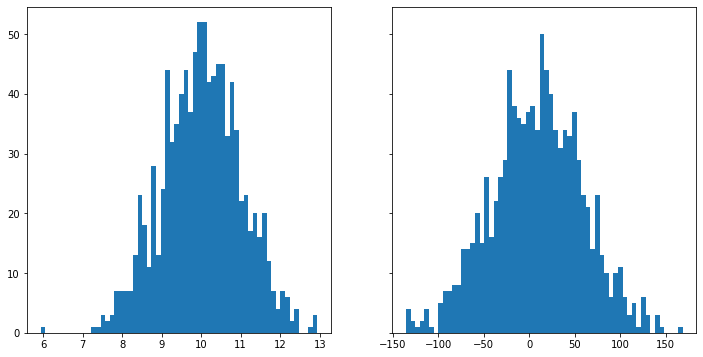

In [33]:
# your code here
from scipy.stats import norm

def normal_rand(mean,stdev,size):
    return norm.rvs(mean,stdev,size)

fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True)

ax[0].hist(x=normal_rand(10,1,1000), bins=60)
ax[1].hist(x=normal_rand(10,50,1000), bins=60)


How are the two distributions different?

In [ ]:
# your answer here:
"""
They are very similar, bu the first one is more centered around the mean and with less tails.

"""

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [21]:
# your code here
import pandas as pd

vec = pd.read_csv("vehicles.csv")
vec.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


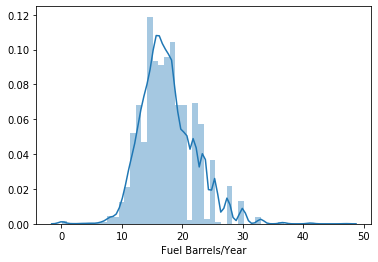

In [27]:
import seaborn as sns

sns.distplot(vec["Fuel Barrels/Year"])

2. CO2 Emission Grams/Mile 

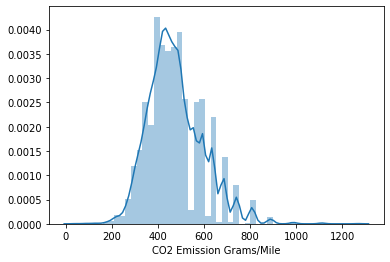

In [28]:
# your code here
sns.distplot(vec["CO2 Emission Grams/Mile"])

3. Combined MPG

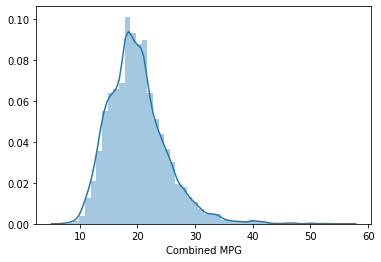

In [29]:
# your code here
sns.distplot(vec["Combined MPG"])

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:
"""
Combined MPG is the closest to a normal distribution. Looking at the histogram the shape of the
bell curve approximates the one of the normal curve, with high density of value around the mean
and very tiny tails. However, it is still skewed to the right when compared to normal.
"""

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

(array([63., 60., 39., 58., 35., 47., 30., 46., 39., 35., 34., 35., 35.,
        13., 27., 25., 29., 28., 20., 21., 19., 10., 12., 21., 14.,  6.,
        13., 10.,  7., 15., 17.,  5.,  9.,  6.,  8.,  9.,  2., 11.,  6.,
         6.,  3.,  2.,  3.,  7.,  9.,  2.,  2.,  2.,  4.,  7.,  1.,  1.,
         3.,  0.,  2.,  0.,  3.,  4.,  1.,  3.,  0.,  1.,  2.,  1.,  1.,
         2.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([1.92333316e-01, 6.14621636e+00, 1.21000994e+01, 1.80539825e+01,
        2.40078655e+01, 2.99617485e+01, 3.59156316e+01, 4.18695146e+01,
        4.78233977e+01, 5.37772807e+01, 5.97311638e+01, 6.56850468e+01,
        7.16389299e+01, 7.75928129e+01, 8.35466960e+01, 8.95005790e+01,
        9.54544621e+01, 1.01408345e+02, 1.07362228e+02, 1.13316111e+02,
        1.19269994e+02, 1.25223877e+02, 1.31177760e+02, 1.37131643e+02,
  

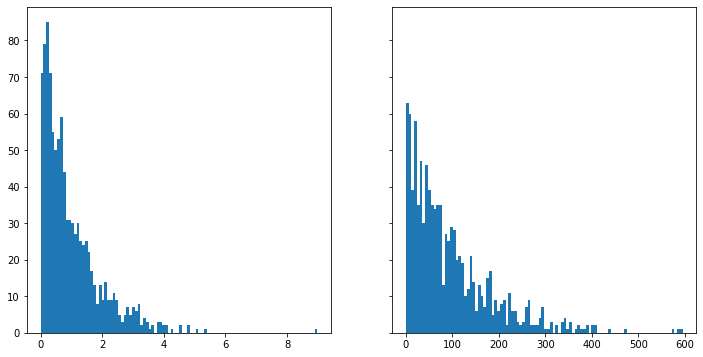

In [35]:
# your code here

def exp_rand(mean,size):
    return np.random.exponential(mean,size)

fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True)

ax[0].hist(x=exp_rand(1,1000), bins=100)
ax[1].hist(x=exp_rand(100,1000), bins=100)

How are the two distributions different?

In [ ]:
# your answer here:
"""
The first one is much more steeper, due to the higher density of frequecy close to 0, given the
mean of 1 VS 100 for the other, which has a much longer right tail in fact.
"""

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [43]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon
prob = expon.cdf(15,10) # 10 used to modify the mean...not sure if it should be 1/10 instead... 
prob


0.9932620530009145

What is the probability that the customer will spend more than 15 minutes

In [44]:
# your answer here
1- prob 

0.006737946999085476